In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/xcheng0907/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


/home/xcheng0907/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/home/xcheng0907/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


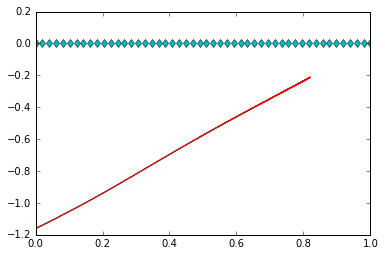

In [3]:
h3f = ['H3AF_E_112', 'H3AF_E_114', 'H3AF_E_116']
h5f = ['H5AF_E_112', 'H5AF_E_114', 'H5AF_E_116']
h3f1 = pd.read_table(h3f[0],sep=r"\s*", header=None)
h3f1 = np.array(h3f1)
h5f1 = pd.read_table(h5f[0],sep=r"\s*", header=None)
h5f1 = np.array(h5f1)
plt.plot(np.exp(-2.0/h5f1[:,0]), h5f1[:,1:4])
mu = np.linspace(0.00001,1, 50)
plt.plot(mu,[0]*len(mu),'d')

HN3 :
[  4.28964949   4.6178298    5.42100191   5.81217909   7.46460056
   7.70162249   8.50205708   8.26856899  10.32308006  10.80003071]


HN5 :
[ 14.99518204  15.63653183  19.48745918  21.25963211  25.90637207
  28.57684708  37.12214279  40.35625076  45.29275131  57.60986328]


HNNP :
[  7.23058891   8.35915947   8.84638214  10.62710476  10.67054653
  11.9774971   14.52178192  15.36184692  16.74440765  16.96369553]


HN6 :
[  7.50815964   7.07629013   8.09662914   9.12346268   9.24590111
  11.098876    11.81870937  12.58883953  15.10793877  14.28436661]




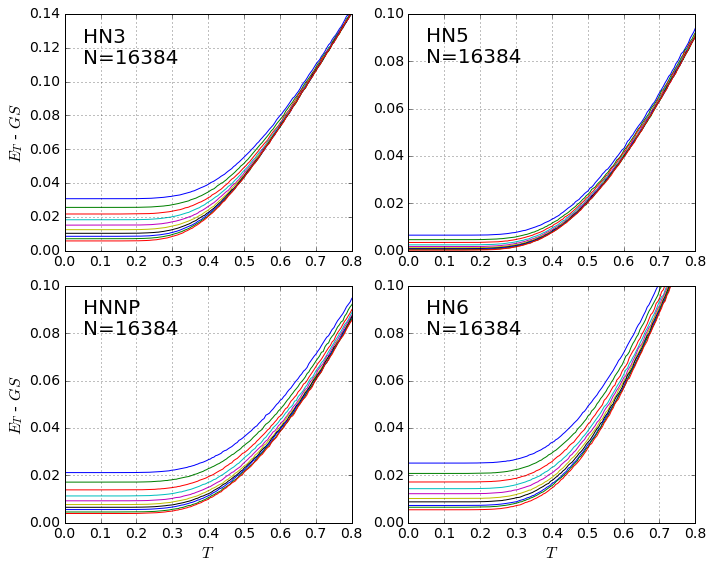

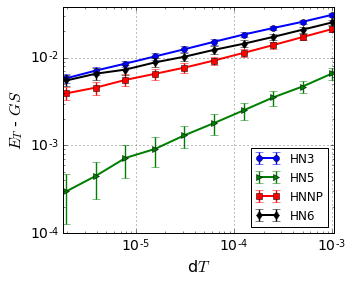

In [2]:
files = ["H3AF_E_114", "H5AF_E_114", "HPAF_E_114", "H6AF1D_E_k14_r0"]
Efiles = ["H3AF_E_low114", "H5AF_E_low114", "HPAF_E_low114", "H6AF1D_E_low_k14_r0"]
gs = [-16384., -19112., -24252., -21064.]

ylims = [[0, 0.14], [0,0.1], [0, 0.1], [0, 0.1]]
Ls = [2**14, 2**14, 2**14, (2**14+1)]
t_loc = [[0.05, 0.123], [0.05, 0.0883], [0.05, 0.0883], [0.05, 0.0883]]
strs = ["HN3", "HN5", "HNNP", "HN6"]
stls = ['b-o', 'g->', 'r-s', 'k-d']
dts = 0.001/np.power(2, range(10))

plt.figure(1, figsize = (10,8))
for i in range(len(gs)):
    plt.subplot(2,2, i+1)
    data = np.loadtxt(files[i])
    plt.plot(data[:,0], (data[:,1:]-gs[i]/Ls[i]))
    #print 'sa:', data[-1,:]
    #print 'gs:', gs[i]/Ls[i]
    plt.xlim([0,0.8])
    plt.ylim(ylims[i])
    if i>1:
        plt.xlabel('$T$', fontsize = 16)
    if i%2==0:
        plt.ylabel('$E_T$ - $GS$', fontsize = 16)
    plt.text(t_loc[i][0], t_loc[i][1], strs[i], fontsize = 20)
    plt.text(t_loc[i][0], t_loc[i][1]*0.9, 'N=16384', fontsize = 20)
    plt.grid('on')
    plt.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('AFM_Jamming_SA_plot.pdf')


plt.figure(2, figsize = (5,4))
for i in range(len(gs)):
    data = np.loadtxt(Efiles[i])
    mean = np.mean(data, axis=0, dtype=np.float32)
    y = (mean-gs[i])/Ls[i]
    erry = np.std(data, axis=0, dtype=np.float32)/Ls[i]
    print strs[i], ':'
    print erry/(mean-gs[i])*Ls[i]*100
    print '\n'
    plt.errorbar(dts, y, yerr=erry, fmt = stls[i], label = strs[i], linewidth=2, elinewidth=1.4, capsize=4.4)#, stls[i], markersize = 6, label = strs[i])
    #print 'sa:', data[-1,:]
    #print 'gs:', gs[i]/Ls[i]
    #plt.xlim([0,0.8])
    #plt.ylim(ylims[i])
plt.tick_params(labelsize=14)
plt.xlabel('d$T$', fontsize = 16)
plt.ylabel(r'$E_{0}$ - $GS$'.format('T'), fontsize = 16)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlim([1.8e-6, 0.00105])
plt.ylim([0.0001,0.038])
plt.grid('on')
plt.tight_layout()
#plt.savefig('AFM_Jamming_SA_scaling_plot.pdf')

#plt.savefig('HP_jamming_scaling.pdf')
#plt.savefig('HP_jamming_scaling.png', dpi=400)

#data = np.loadtxt(files[1])
#plt.figure(2, figsize=(6,6))


## AFM Jamming plot with RG curves

HN3 :
[  4.28964949   4.6178298    5.42100191   5.81217909   7.46460056
   7.70162249   8.50205708   8.26856899  10.32308006  10.80003071]


HN5 :
[ 14.99518204  15.63653183  19.48745918  21.25963211  25.90637207
  28.57684708  37.12214279  40.35625076  45.29275131  57.60986328]


HNNP :
[  7.23058891   8.35915947   8.84638214  10.62710476  10.67054653
  11.9774971   14.52178192  15.36184692  16.74440765  16.96369553]


HN6 :
[  7.50815964   7.07629013   8.09662914   9.12346268   9.24590111
  11.098876    11.81870937  12.58883953  15.10793877  14.28436661]




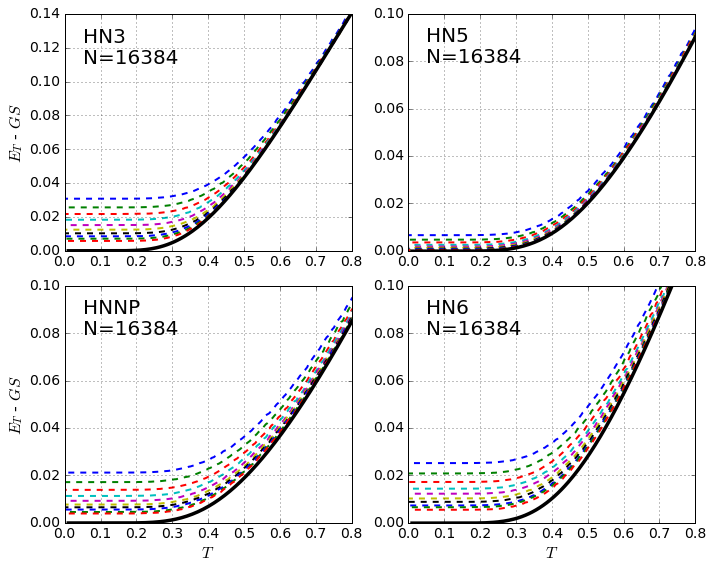

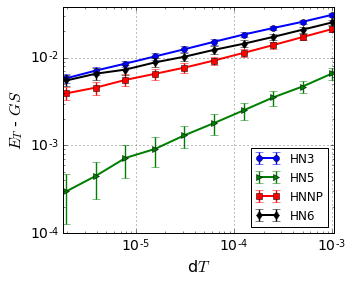

In [26]:
files = ["H3AF_E_114", "H5AF_E_114", "HPAF_E_114", "H6AF1D_E_k14_r0"]
Efiles = ["H3AF_E_low114", "H5AF_E_low114", "HPAF_E_low114", "H6AF1D_E_low_k14_r0"]
RGfiles = ['HN3_AFM_IE.csv', 'HN5_AFM_IE.csv', 'HNNP_AFM_IE.csv', 'HN6_AFM_IE.csv']
RGfiles = ['../WL_RG/'+fn for fn in RGfiles]
colind = -1
gs = [-16384., -19112., -24252., -21064.]

sty1 = '--'
linewidth1=2
sty2 = 'k-'
linewidth2=3.5
ylims = [[0, 0.14], [0,0.1], [0, 0.1], [0, 0.1]]
Ls = [2**14, 2**14, 2**14, (2**14+1)]
t_loc = [[0.05, 0.123], [0.05, 0.0883], [0.05, 0.0883], [0.05, 0.0883]]
strs = ["HN3", "HN5", "HNNP", "HN6"]
stls = ['b-o', 'g->', 'r-s', 'k-d']
dts = 0.001/np.power(2, range(10))

plt.figure(1, figsize = (10,8))
for i in range(len(gs)):
    plt.subplot(2,2, i+1)
    data = np.loadtxt(files[i])
    plt.plot(data[:,0], (data[:,1:]-gs[i]/Ls[i]), sty1, linewidth=linewidth1)
    rgdata = np.loadtxt(RGfiles[i], delimiter=',')
    mvinvs = rgdata[1:,1]
    ys = rgdata[1:, colind]
    plt.plot(mvinvs, (ys-gs[i]/Ls[i]), sty2, linewidth=linewidth2)
    #print 'sa:', data[-1,:]
    #print 'gs:', gs[i]/Ls[i]
    plt.xlim([0,0.8])
    plt.ylim(ylims[i])
    if i>1:
        plt.xlabel('$T$', fontsize = 16)
    if i%2==0:
        plt.ylabel('$E_T$ - $GS$', fontsize = 16)
    plt.text(t_loc[i][0], t_loc[i][1], strs[i], fontsize = 20)
    plt.text(t_loc[i][0], t_loc[i][1]*0.9, 'N=16384', fontsize = 20)
    plt.grid('on')
    plt.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('AFM_Jamming_SA_plot.pdf')


plt.figure(2, figsize = (5,4))
for i in range(len(gs)):
    data = np.loadtxt(Efiles[i])
    mean = np.mean(data, axis=0, dtype=np.float32)
    y = (mean-gs[i])/Ls[i]
    erry = np.std(data, axis=0, dtype=np.float32)/Ls[i]
    print strs[i], ':'
    print erry/(mean-gs[i])*Ls[i]*100
    print '\n'
    plt.errorbar(dts, y, yerr=erry, fmt = stls[i], label = strs[i], linewidth=2, elinewidth=1.4, capsize=4.4)#, stls[i], markersize = 6, label = strs[i])
    #print 'sa:', data[-1,:]
    #print 'gs:', gs[i]/Ls[i]
    #plt.xlim([0,0.8])
    #plt.ylim(ylims[i])
plt.tick_params(labelsize=14)
plt.xlabel('d$T$', fontsize = 16)
plt.ylabel(r'$E_{0}$ - $GS$'.format('T'), fontsize = 16)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlim([1.8e-6, 0.00105])
plt.ylim([0.0001,0.038])
plt.grid('on')
plt.tight_layout()
#plt.savefig('AFM_Jamming_SA_scaling_plot.pdf')

#plt.savefig('HP_jamming_scaling.pdf')
#plt.savefig('HP_jamming_scaling.png', dpi=400)

#data = np.loadtxt(files[1])
#plt.figure(2, figsize=(6,6))
